In [1]:
import torch
from ptbxlae.modeling.convolutionalVAE import ConvolutionalEcgVAE

* PTB-XL Autoencoder *


In [2]:
torch.no_grad()
m = ConvolutionalEcgVAE.load_from_checkpoint('../cache/savedmodels/synthetic-epoch=017-val_loss=0.077020.ckpt')
m.eval()

ConvolutionalEcgVAE(
  (encoder): ConvolutionalEcgEncoder(
    (net): Sequential(
      (0): Conv1d(12, 24, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): Conv1d(24, 48, kernel_size=(7,), stride=(2,), padding=(3,))
      (3): LeakyReLU(negative_slope=0.01)
      (4): Conv1d(48, 96, kernel_size=(7,), stride=(2,), padding=(3,))
      (5): LeakyReLU(negative_slope=0.01)
      (6): Conv1d(96, 192, kernel_size=(7,), stride=(2,), padding=(3,))
      (7): LeakyReLU(negative_slope=0.01)
      (8): Conv1d(192, 384, kernel_size=(7,), stride=(2,), padding=(3,))
      (9): LeakyReLU(negative_slope=0.01)
      (10): Flatten(start_dim=1, end_dim=-1)
      (11): Linear(in_features=12288, out_features=3072, bias=True)
      (12): LeakyReLU(negative_slope=0.01)
      (13): Linear(in_features=3072, out_features=768, bias=True)
      (14): LeakyReLU(negative_slope=0.01)
    )
  )
  (decoder): ConvolutionalEcgDecoder(
    (net): Sequential(
      (0): Lin

In [5]:
from ptbxlae.dataprocessing.nkSyntheticDS import NkSyntheticDS

SAMPLE_IDX = 929

ds = NkSyntheticDS()
sig = ds[SAMPLE_IDX]
sig.shape

torch.Size([12, 1000])

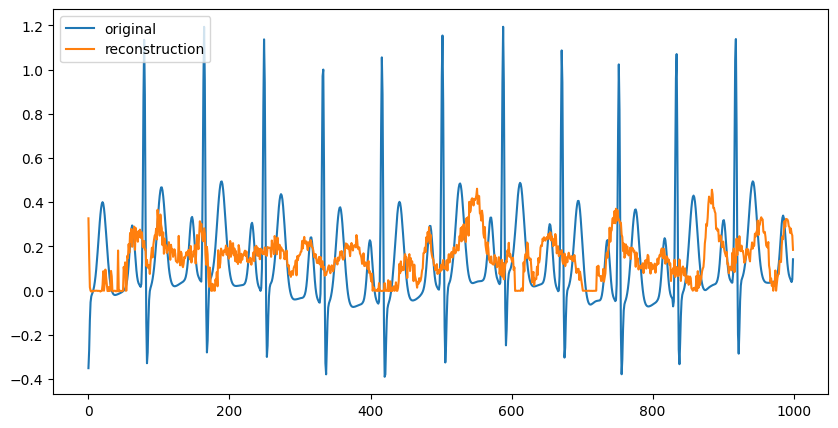

In [6]:
# from ptbxlae.dataprocessing import plot_raw_data

# # before
# plot_raw_data(sig[0:12], {'fs': 500})

import matplotlib.pyplot as plt

x = range(0, sig.shape[1])

SAMPLE_IDX = 5839
CHANNEL = 0

latent_representation = m.encode(ds[SAMPLE_IDX].unsqueeze(0).to('cuda'))
# reconstruction = m.generate(latent_representation, smoothing_iterations=10).squeeze().detach().cpu()
reconstruction = m.decode(latent_representation).squeeze().detach().cpu()
orig_plot = ds[SAMPLE_IDX][CHANNEL]
recon_plot = reconstruction[CHANNEL]

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
ax.plot(x, orig_plot, label='original')
ax.plot(x, recon_plot, label='reconstruction')
plt.legend(loc='best')